“Fake news” is a term that has come to mean different things to different people. At its core, we are
defining “fake news” as those news stories that are
false: the story itself is fabricated, with no verifiable
facts, sources or quotes.

It is becoming regular to resolve the fake news problems for some certain search engines like Google. With the advancement in Artificial Intelligence these kinds of problems also can be analyzed.

### Project Info:

In our project we are going analyze & identify this fake news with the help of Artificial Intelligence Module which is Natural Language Processing. This Module is specialized in handling of the text data from the articles.

The module is developed in Python programming language which is easy to understand & work upon our
analysis.

### Data Set info:

we will be handling a News article dataset, in which we will follow certain text
preprocessing/cleaning steps and then we will apply that text to Machine Learning models which is
also another module of AI for Predictive analysis, will predict the news either real or fake.

This dataset is gathered from Open Source with the reference of data-flair.training site.

Main features of Data We are going to analyze:

* Title of the News
* News Text
* Prediction

Dimensions: 6335 rows and 4 columns

### Process Info:

* Loading Data
* Cleaning of Text Data using NLTK Library, NLP
* Extracting Important Words/Sentences that can give the prediction of real or fake news
* Visualization of Words
* Applying Word embedding techniques to the selected words (converting words into Machine learning Data)
* Splitting the into Train and Test
* Buliding model on train data 
* Predictions On Test data 
* Comparision of differet ML Models for the data
* Model Evaluation
* Saving Model for future reference
* End notes

#### Loading Libraries and Data required

In [1]:
import pandas as pd                          # Data Processing Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading of Data

raw = pd.read_csv("news.csv")

In [3]:
raw.shape

(6335, 4)

In [4]:
# first five rows of data

raw.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
# Changing Column Names According to our Requirement

raw.columns = ['Id', 'TitleofThe News','NewsText', 'Prediction']
raw.head()

,Id,TitleofThe News,NewsText,Prediction
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [6]:
# Checking for Missing Values

raw.isnull().sum()

Id                 0
TitleofThe News    0
NewsText           0
Prediction         0
dtype: int64

In [7]:
# Droping Duplicated rows

raw.drop_duplicates(inplace=True)

In [8]:
# Taking The News Text Column only for Text Preprocessing

for i in range(0,len(raw)):
    text = raw['NewsText'][i].replace('\n','')
    raw['NewsText'][i] = text

In [9]:
# 1st Article Text

print(raw.NewsText[0])

Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. In the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. The word “unprecedented” has been thrown around so often this election that it ought to be retired. But it’s still unprecedented for the nominee of a major political party to go war with the FBI. But that’s exactly what Hillary and her people have done. Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillary’s opponent in this election. The FBI is under attack by everyone from Obama to CNN. Hillary’s people have circulated a letter attacking Comey. There are currently more media hit pieces lambasting him than targeting Trump. It wouldn’t be too surprising if the Clintons or their allies were to start running attack ads against the FBI. The FBI’s leadership is being warned that the entire left-wing

### Text mining or Text Preprocessing (Text Cleaning)

In [10]:
import nltk  #(Natural Language Tool Kit - NLTK)                               # NLP Libraries
import re
import string

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [11]:
#nltk.download() # Loading Necessary libraries from Nltk

In [12]:
# Preprocessing functions of Text Data

stop_words = set(stopwords.words('english')) # Stopwords function
wn = WordNetLemmatizer()        # lemmatization

#### Preprocessing (Cleaning) Text and attaching the important words to the corpus of Articles

In [13]:
# Taking empty Corpus (corpus represents all the major words in all articles)

corpus = []

In [14]:
for i in range(0,len(raw)):
    print(i)
    review = re.sub('[^a-zA-Z]',' ',raw['NewsText'][i])
    # split into words
    tokens = word_tokenize(review)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words
    words = [w for w in words if not w in stop_words]
    # Lemmatization of words (Root Word Retrieval)
    lemwords = [wn.lemmatize(word) for word in words]
    # Removing Duplicated Words
    impwords = set(lemwords)
    # Joining the words
    impwords = ' '.join(impwords)
    
    corpus.append(impwords)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704


5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344


In [16]:
corpus[0] # First Article with Important Words After Text Cleanings

'rank hospital desperate hatch exposed ally question latest greenfield job investigation stand headline could classified react compared story senator bribery fbi illegality scene party vast desperation daniel savage even charge hack nonsense spouting exactly shown left public back sent try deny throughout strategy emailing age picking display plan candidate focused ryan knew nominee kgb sudden fear afraid bigger center fire remind wrong know control value apolitical vladimir outcome focusing claiming attacked development final insane awkwardly front setup information procedural trapped hubris people elect allowed intimidation editorial assume statement retired loyalist closing fairly lambasting kind protecting thought often arrogant continue york anthony pose ahead waking investigator clintonworld sexual thrown smart putin already ought email underway nothing lynch step bring assault accused act awkward threat republican violation glancing relief ever doj decided appeared running illeg

#### Visualization of Text Words

In [17]:
from wordcloud import WordCloud  # Libaray for Visualization of Words

In [18]:
wc=WordCloud(background_color="white")

In [19]:
news_text = "".join(corpus)

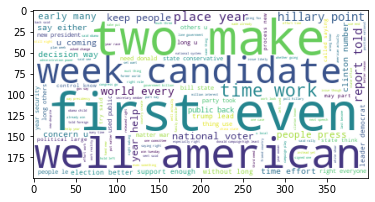

In [20]:
wc_img=wc.generate(news_text)
plt.imshow(wc_img)

### Word embedding techniques

* We cannot use the text data directly in ml algorithms. In order to use it in machine learning algorithms, we must convert the text to numerical feature vectors. We can use Tfidf and CountVectorizer for this. we can count the number of times a word appears in the document with CountVectorizer. Tfidf uses a statistical method to do this.

####  Taking Numeric vectors for words of articles

#### 1. Bag Of Words or CountVectorizer

In [21]:
from sklearn.feature_extraction.text import CountVectorizer # Library

In [22]:
cv=CountVectorizer(max_features = 2000) # Creating function for the 2000 words

In [23]:
x=cv.fit_transform(corpus).toarray() # fitting and Converting them to array
x.shape

(6335, 2000)

In [24]:
cv.get_feature_names() # Column Names as Words

['abc',
 'ability',
 'able',
 'abortion',
 'absolutely',
 'abuse',
 'accept',
 'accepted',
 'access',
 'according',
 'account',
 'accusation',
 'accused',
 'acknowledged',
 'across',
 'act',
 'acting',
 'action',
 'active',
 'activist',
 'activity',
 'actual',
 'actually',
 'ad',
 'add',
 'added',
 'adding',
 'addition',
 'additional',
 'address',
 'administration',
 'admitted',
 'adult',
 'advance',
 'advantage',
 'adviser',
 'advocate',
 'affair',
 'affect',
 'afghanistan',
 'african',
 'afternoon',
 'age',
 'agency',
 'agenda',
 'agent',
 'aggressive',
 'ago',
 'agree',
 'agreed',
 'agreement',
 'ahead',
 'aid',
 'aide',
 'aim',
 'aimed',
 'air',
 'al',
 'allegation',
 'alleged',
 'allegedly',
 'alliance',
 'allow',
 'allowed',
 'allowing',
 'allows',
 'ally',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'alternative',
 'although',
 'always',
 'amendment',
 'america',
 'american',
 'amid',
 'among',
 'amount',
 'analysis',
 'analyst',
 'andrew',
 'anger',
 'angry',
 'announc

##### Final data1

In [25]:
data1 = pd.DataFrame(x,columns=cv.get_feature_names()) # Conversion of words to machine learning data

#### 2. TF-IDF

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer   # Library

In [27]:
tfidf=TfidfVectorizer(max_features = 2000) # Creating function for the 2000 words

In [28]:
x_tfidf=tfidf.fit_transform(corpus).toarray() # fitting the function on words and Converting them to array

In [29]:
x_tfidf.shape

(6335, 2000)

In [30]:
x_tfidf

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.12459602, 0.        , 0.        , ..., 0.        , 0.12143753,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [31]:
tfidf.get_feature_names()

['abc',
 'ability',
 'able',
 'abortion',
 'absolutely',
 'abuse',
 'accept',
 'accepted',
 'access',
 'according',
 'account',
 'accusation',
 'accused',
 'acknowledged',
 'across',
 'act',
 'acting',
 'action',
 'active',
 'activist',
 'activity',
 'actual',
 'actually',
 'ad',
 'add',
 'added',
 'adding',
 'addition',
 'additional',
 'address',
 'administration',
 'admitted',
 'adult',
 'advance',
 'advantage',
 'adviser',
 'advocate',
 'affair',
 'affect',
 'afghanistan',
 'african',
 'afternoon',
 'age',
 'agency',
 'agenda',
 'agent',
 'aggressive',
 'ago',
 'agree',
 'agreed',
 'agreement',
 'ahead',
 'aid',
 'aide',
 'aim',
 'aimed',
 'air',
 'al',
 'allegation',
 'alleged',
 'allegedly',
 'alliance',
 'allow',
 'allowed',
 'allowing',
 'allows',
 'ally',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'alternative',
 'although',
 'always',
 'amendment',
 'america',
 'american',
 'amid',
 'among',
 'amount',
 'analysis',
 'analyst',
 'andrew',
 'anger',
 'angry',
 'announc

##### Final Data2

In [32]:
data2 = pd.DataFrame(x_tfidf,columns=tfidf.get_feature_names()) # Conversion of words to machine learning data

### Modeling

* We got two data sets with words and their respective vectors for the modeling

* we are going to use these datasets and train them with machine learning classification model Random forest Classifier

#### Input Data

In [33]:
print(data1.head())
print()
print(data2.head())

   abc  ability  able  abortion  absolutely  abuse  accept  accepted  access  \
0    0        0     0         0           0      1       0         0       0   
1    1        0     0         0           0      0       0         0       0   
2    0        0     0         0           0      0       0         0       0   
3    0        0     0         0           0      0       0         0       0   
4    0        0     0         0           0      0       0         0       0   

   according  ...  wrong  wrote  year  yes  yesterday  yet  york  young  zero  \
0          0  ...      1      0     1    0          0    0     1      0     0   
1          0  ...      0      0     0    0          0    0     0      0     1   
2          0  ...      0      0     1    0          0    0     0      0     0   
3          1  ...      0      0     0    0          0    0     1      0     0   
4          0  ...      0      0     1    0          0    1     1      1     0   

   zone  
0     0  
1     0  
2 

#### Taking the Input data and predictions as x & y for the modeling

* we will be considering two datasets (data1 & data2) from the vectorization BOW and Tf-Idf as input datasets x1 & x2

In [34]:
x1 = data1
x2 = data2

y = raw.Prediction

#### Converting y(predictions) into numerical

In [35]:
y = np.where(y=='FAKE',0,1)

In [36]:
y

array([0, 0, 1, ..., 0, 1, 1])

#### Splitting the dataset into the Training set and Test set

* Splitting Data Into train and test will help us to train & Predict the data for different models of Machine Learning

In [37]:
from sklearn.model_selection import train_test_split
  
x1_train, x1_test, y_train, y_test = train_test_split(x1, y, test_size = 0.25)
x2_train, x2_test, y_train, y_test = train_test_split(x2, y, test_size = 0.25)

#### We will check two classification models of machine learning for our data 

#### 1. Naive Bayes Classifier
#### 2. Random Forest Classifier

** Where we are going to train the models on Train data & predictions on Test Data

#### NaiveBayes Classifier

In [38]:
# Library Load

from sklearn.naive_bayes import GaussianNB

In [39]:
# Function Assign two

gnb1 = GaussianNB()
gnb2 = GaussianNB()

In [40]:
# Training the models on training set

gnb1.fit(x1_train, y_train) # Bow Data Train
gnb2.fit(x2_train, y_train) # Tf-Idf Data Train

GaussianNB()

In [41]:
# making predictions on the testing set

y_pred1 = gnb1.predict(x1_test) # Bow Predictions
y_pred2 = gnb2.predict(x2_test) # Tf-Idf Predictions

In [42]:
# comparing actual response values (y_test) with predicted response values (y_pred)
# accuracy Check On Both the Data for the trained Model...

from sklearn import metrics

print("Gaussian Naive Bayes model (gnb1) accuracy(in %):", metrics.accuracy_score(y_test, y_pred1)*100)
print("Gaussian Naive Bayes model (gnb2) accuracy(in %):", metrics.accuracy_score(y_test, y_pred2)*100)

Gaussian Naive Bayes model (gnb1) accuracy(in %): 49.24242424242424
Gaussian Naive Bayes model (gnb2) accuracy(in %): 86.5530303030303


#### Random Forest Classifier

In [43]:
# Library Load

from sklearn.ensemble import RandomForestClassifier

In [44]:
# Function Assign

rf1 = RandomForestClassifier()
rf2 = RandomForestClassifier()

In [45]:
# Fitting Function on Train Data

rf1.fit(x1_train, y_train) # Bow Data Train
rf2.fit(x2_train, y_train) # Tf-Idf Data Train

RandomForestClassifier()

In [46]:
# Predictions on Test Data

y_pred3 = rf1.predict(x1_test) # Bow Predictions
y_pred4 = rf2.predict(x2_test) # Tf-Idf Predictions

In [47]:
# Comparing actual response values (y_test) with predicted response values (y_pred)
# Accuracy Check On Both the Data for the trained Model...

print("Randomforest Classifier (rf1) accuracy(in %):", metrics.accuracy_score(y_test, y_pred3)*100)
print("Randomforest Classifier (rf2) accuracy(in %):", metrics.accuracy_score(y_test, y_pred4)*100)

Randomforest Classifier (rf1) accuracy(in %): 48.98989898989899
Randomforest Classifier (rf2) accuracy(in %): 88.38383838383838


#### We got better accuracy for the random forest classifier on the tf-idf data set 

* On further we will be using the Tf-Idf vectorization for word transformation and we will be using Randomforest classifier model (rf2) for real time prediction

### Notes:

* #### Selected Model :- Random Forest Classifier 
* #### Data :- TF-IDF Data

#### Real time Prediction for a Given Article

In [48]:
article = input("Enter article Text: \n ")

Enter article Text: 
 Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. In the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. The word “unprecedented” has been thrown around so often this election that it ought to be retired. But it’s still unprecedented for the nominee of a major political party to go war with the FBI. But that’s exactly what Hillary and her people have done. Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillary’s opponent in this election. The FBI is under attack by everyone from Obama to CNN. Hillary’s people have circulated a letter attacking Comey. There are currently more media hit pieces lambasting him than targeting Trump. It wouldn’t be too surprising if the Clintons or their allies were to start running attack ads against the FBI. The FBI’s leadership is being warned tha

In [49]:
def preprocess(text):
    
    # split into words
    tokens = word_tokenize(text)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words
    words = [w for w in words if not w in stop_words]
    # Lemmatization of words (Root Word Retrieval)
    lemwords = [wn.lemmatize(word) for word in words]
    # Removing Duplicated Words
    impwords = set(lemwords)
    # Joining the words
    impwords = ' '.join(impwords)
    
    return impwords

In [50]:
preprocess(text)

'trumpthe rise view consider wo support rick state granite think conservative seen came jeb never mr according smart necessary nt fergus hundred punch proposal win tactic pointed oconnell history john lobbed swatted stand day still joyfully kasich night could many dropped language unelectable timehe directly tone best circumstance attack story record mccain part may glove approach washington room party took former frontrunner rhetoric republican also ohio appeal wanted consistently longer let cullen percent mattersjeb appeared uncomfortable one floodgate criticized defend volleyed base would dollar proven debate price embraced bet first even landother issue buffoon something though tripped hitting month trumpbush blasted demurred phrase hold went desperately mediabut used left appear risen election twitterthe hit reform clinton said like arguing shake clown taking pitch kid entertained crouch underscoring splitscreen given hot completely service attempting word immigration jab plan wee

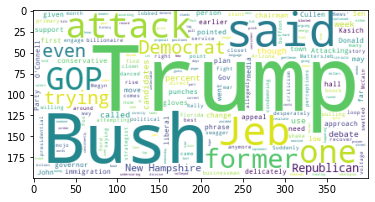

In [51]:
news_text = "".join(text)
wc_img = wc.generate(news_text)
plt.imshow(wc_img)

In [52]:
text_tfidf = tfidf.transform([text]).toarray()

In [53]:
text_tfidf.shape

(1, 2000)

In [54]:
text_tfidf

array([[0., 0., 0., ..., 0., 0., 0.]])

In [55]:
prediction = np.where(rf2.predict(text_tfidf) == 0, 'FAKE', 'REAL')

In [56]:
prediction[0]

'REAL'

#### Saving the Model for Further Usage

In [58]:
import joblib

In [60]:
# Save the model as a pickle in a file
joblib.dump(rf2, 'Deployment/finalmodel.pkl')

['Deployment/finalmodel.pkl']

In [61]:
# Load the model from the file
finalmodel_rf2 = joblib.load('finalmodel.pkl')

In [64]:
joblib.dump(tfidf, 'Deployment/vectorizer.pkl')

['Deployment/vectorizer.pkl']